## Imports

In [20]:
import numpy as np
import pandas as pd
from scipy.io import arff
from matplotlib import pyplot as plt

## Reading Data

In [21]:
# Change filename here
filename = 'CM1.arff.txt'

data = arff.loadarff(filename)
loaddata = pd.DataFrame(data[0])
loaddata.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,2.0,3.0,0.0,0.0,8.0,4.0,2.0,0.22,2.0,2.00,...,6.0,0.22,5.0,10.0,4.0,7.0,9.0,47.06,9.0,b'N'
1,3.0,3.0,0.0,2.0,2.0,4.0,2.0,0.15,2.0,2.00,...,5.0,0.11,10.0,22.0,5.0,12.0,19.0,26.67,13.0,b'N'
2,38.0,35.0,4.0,5.0,70.0,58.0,18.0,0.17,24.0,2.42,...,51.0,0.08,150.0,222.0,58.0,32.0,218.0,41.90,109.0,b'N'
3,1.0,7.0,5.0,0.0,12.0,12.0,4.0,0.10,6.0,2.00,...,18.0,0.06,50.0,79.0,36.0,19.0,68.0,22.64,41.0,b'Y'
4,9.0,15.0,4.0,14.0,22.0,28.0,8.0,0.20,14.0,2.00,...,24.0,0.11,29.0,64.0,19.0,18.0,73.0,57.14,41.0,b'N'


## Acquire X and Y values

In [22]:
software_metrics = np.array(loaddata[['LOC_BLANK','BRANCH_COUNT','CALL_PAIRS','LOC_CODE_AND_COMMENT']])
labels = np.array(loaddata['Defective'])

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(software_metrics, labels, test_size = 0.1)
y_train = y_train.astype('str')
y_test = y_test.astype('str')

## Selecting a Model (Logistic Regression)

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logreg.predict(X_test)
predictions

array(['N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype='<U1')

## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted Non-Defective', "Predicted Defective"], index=['Actual Non-Defective', 'Actual Defective'])

,Predicted Non-Defective,Predicted Defective
Actual Non-Defective,26,0
Actual Defective,6,1


In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 1
False Positives: 0
True Negatives: 26
False Negatives: 6


## Prediction Possibilities

In [71]:
y_test

array(['N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y'], dtype='<U1')

In [72]:
X_test

array([[ 1.,  3.,  0.,  0.],
       [12.,  7.,  2.,  2.],
       [24., 37.,  6.,  0.],
       [ 3.,  3.,  0.,  2.],
       [55., 34., 25.,  3.],
       [15.,  5.,  1.,  7.],
       [ 7.,  3.,  3.,  0.],
       [ 1.,  3.,  4.,  0.],
       [13.,  7.,  3.,  3.],
       [74., 23., 10., 30.],
       [93., 25., 10., 11.],
       [18.,  6.,  6.,  7.],
       [20., 21.,  2.,  7.],
       [17., 21.,  4.,  1.],
       [14.,  9.,  3.,  2.],
       [ 4.,  3.,  1.,  2.],
       [16., 29.,  5.,  3.],
       [ 5.,  7.,  1.,  0.],
       [23., 13.,  0., 10.],
       [10.,  5.,  9.,  2.],
       [ 0.,  7.,  0.,  0.],
       [12.,  9.,  3.,  1.],
       [10., 15.,  6.,  2.],
       [ 2.,  5.,  2.,  2.],
       [ 0.,  3.,  0.,  0.],
       [13.,  5.,  3.,  4.],
       [ 3.,  3.,  0.,  0.],
       [33., 23.,  1.,  5.],
       [35., 31.,  9., 28.],
       [19., 13.,  4.,  4.],
       [ 0.,  7.,  3.,  0.],
       [40., 11.,  4., 25.],
       [36., 13.,  5.,  6.]])

In [52]:
random_probs = [0 for _ in range(len(y_test))]
logreg_probs = logreg.predict_proba(X_test)

Keep probabilities of positive outcome only

In [53]:
logreg_probs = logreg_probs[:, 1]

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

## Computing AUC values

In [55]:
random_auc = roc_auc_score(y_test,random_probs)
logreg_auc = roc_auc_score(y_test,logreg_probs)

In [56]:
print(f'Random Chance Prediction: ROC AUC = {random_auc}')
print(f'Logisitc Regression: ROC AUC = {logreg_auc}')

Random Chance Prediction: ROC AUC = 0.5
Logisitc Regression: ROC AUC = 0.7967032967032966


### Computing ROC Curve

In [80]:
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label='Y')
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs, pos_label='Y')

### Plotting ROC Curve

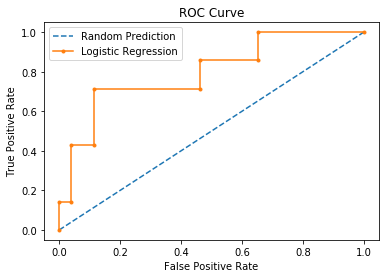

In [81]:
plt.plot(random_fpr,random_tpr,linestyle='--',label='Random Prediction')
plt.plot(logreg_fpr,logreg_tpr,marker='.',label='Logistic Regression')

# Title of Curve
plt.title('ROC Curve')
# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend()
# Show Show
plt.show()